# <center>Thyroid Disease Dataset</center>

## About Dataset
* This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.
* Dataset Link: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data

<b>Source</b>
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

<b>Content</b>
The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

* Age: The age of the patient at the time of diagnosis or treatment.
<br>

* Gender: The gender of the patient (male or female).
<br>

* Smoking: Whether the patient is a smoker or not.
<br>

* Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
<br>

* Hx Radiotherapy: History of radiotherapy treatment for any condition.
<br>

* Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
<br>

* Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
<br>

* Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
<br>

* Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
<br>

* Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
<br>

* Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
<br>

* T: Tumor classification based on its size and extent of invasion into nearby structures.
<br>

* N: Nodal classification indicating the involvement of lymph nodes.
<br>

* M: Metastasis classification indicating the presence or absence of distant metastases.
<br>

* Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
<br>

* Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
<br>

* Recurred: Indicates whether the cancer has recurred after initial treatment.

In [22]:
#importing the dependables
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [23]:
#laoding the dataset
df = pd.read_csv('Thyroid_Diff.csv')
df.head(10) #displaying the first 10 rows

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


## Data Exploration

In [24]:
rows, columns = df.shape

print(f"number of rows are: {rows} rows")
print(f"number of columns are: {columns} columns")

number of rows are: 383 rows
number of columns are: 17 columns


In [25]:
#getting more information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

### info:
* From the above information, we observed that almost all the columns are object datatype i.e categorical, only the Age that is numeric
* There is no null value present in any column

In [26]:
#Getting the descriptive statistics from the numeric column present in the dataset i.e of the age
df.describe()[["Age"]]

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


* The average age is 41yrs
* The min age is 15yrs
* The max age is 82 years

In [27]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

### Understanding the unique values of the features

In [28]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [29]:
df.Smoking.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [31]:
df.Adenopathy.unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [32]:
df.Age.unique()

array([27, 34, 30, 62, 52, 41, 46, 51, 40, 75, 59, 49, 50, 76, 42, 44, 43,
       36, 70, 60, 33, 26, 37, 55, 31, 45, 20, 38, 29, 25, 21, 23, 24, 35,
       54, 22, 69, 28, 17, 73, 18, 39, 57, 66, 32, 47, 56, 63, 19, 67, 72,
       61, 68, 48, 81, 53, 58, 80, 79, 65, 15, 82, 71, 64, 78],
      dtype=int64)

In [33]:
df.Risk.unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [34]:
df.Stage.unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [35]:
df.Response.unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [36]:
#Checking how many males and females are present in the dataset
df.groupby('Gender')['Gender'].count()

Gender
F    312
M     71
Name: Gender, dtype: int64

In [37]:
df.groupby('Gender')['Gender'].count()/rows * 100

Gender
F    81.462141
M    18.537859
Name: Gender, dtype: float64

* From the given dataset, female patients are 312 while male patients are 71
* We can also say that 81.46% are Females, while 18.54% are Males


### Checking how many males and females that are smoking, has smoking history, and has radiotherapy history

In [38]:
#slicing out the males from the whole dataset
males = df[df["Gender"] == "M"]
males.shape # a total of 71 males as initially gotten

(71, 17)

In [39]:
males.groupby(["Smoking","Hx Smoking","Hx Radiothreapy"])["Smoking"].count()

Smoking  Hx Smoking  Hx Radiothreapy
No       No          No                 30
         Yes         No                  1
Yes      No          No                 26
                     Yes                 3
         Yes         No                  8
                     Yes                 3
Name: Smoking, dtype: int64

* from the dataset, a total number of 31 male out of 71 males patients are not smoking but 1 has smoking history while 30 doesn't and none has Radiothreapy History
* Also, from the dataset, a total number of 40 males out of 71 males patients are smoking, 29 of then doesn't has smoking history, 11 has smoking history, then 3 has Radiothreapy History ans 8 doesn't

In [40]:
#slicing out the females from the whole dataset
females = df[df["Gender"] == "F"]
females.shape # a total of 312 males as initially gotten

(312, 17)

In [41]:
females.groupby(["Smoking","Hx Smoking","Hx Radiothreapy"])["Smoking"].count()

Smoking  Hx Smoking  Hx Radiothreapy
No       No          No                 288
         Yes         No                  14
                     Yes                  1
Yes      No          No                   8
         Yes         No                   1
Name: Smoking, dtype: int64

In [42]:
288 +14

302

* from the dataset, a total number of 303 female out of 312 females patients are not smoking but 15 has smoking history while 288 doesn't and 302 doesn't have Radiothreapy History while 1 has
* Also, from the dataset, a total number of 9 females out of 312 females patients are smoking, 8 of then doesn't have smoking history, 1 has smoking history, then none has Radiothreapy History .

* Then in general a total number it was observed that the male smokes more than the females even the male patients has more of the patients with smoking and radiothreapy history than that of the females

### Getting insight from the Risk feature

In [43]:
df.groupby(["Gender","Smoking","Hx Smoking","Risk"])[["Risk"]].count()

Risk
Gender Smoking Hx Smoking Risk              
F      No      No         High            12
                          Intermediate    70
                          Low            206
               Yes        High             1
                          Intermediate     2
                          Low             12
       Yes     No         High             3
                          Intermediate     1
                          Low              4
               Yes        High             1
M      No      No         High             1
                          Intermediate    13
                          Low             16
               Yes        Intermediate     1
       Yes     No         High             9
                          Intermediate    11
                          Low              9
               Yes        High             5
                          Intermediate     4
                          Low              2

### Getting insight from the Stage and Gender feature

In [44]:
df.groupby(["Gender","Stage"])[["Gender"]].count()

Gender
Gender Stage        
F      I         284
       II         20
       III         2
       IVA         1
       IVB         5
M      I          49
       II         12
       III         2
       IVA         2
       IVB         6

* From the above, we can see that the Female Gender has the large number of Patients with stage 1 thyroid disease which can be caused by many factors

### Getting insight from the Age column and creating an Age class column, with the risk

* 15 - 20 --> Adolescent 
* 21 - 35 --> Youths
* 36 - 55 --> Adults
* 56 above --> old

In [45]:
#Creating a function to group the Age of the patients into various classes
def age_class(x):
    if x <= 20:
        return "Adolescent"
    elif x <=35 and x >=21:
        return "Youths"
    elif x <=55 and x >=36:
        return "Adults"
    else:
        return "Old"

In [46]:
age_class(20)

'Adolescent'

In [47]:
#using lambda function to apply the above created age_class function to the dataframe
df["Age Class"] = df["Age"].apply(lambda x: age_class(x))

In [48]:
df['Age Class'].unique()

array(['Youths', 'Old', 'Adults', 'Adolescent'], dtype=object)

In [49]:
df.groupby(["Age Class","Risk"])[["Risk"]].count()

Risk
Age Class  Risk              
Adolescent High             1
           Intermediate     6
           Low              6
Adults     High             7
           Intermediate    34
           Low             92
Old        High            18
           Intermediate    25
           Low             31
Youths     High             6
           Intermediate    37
           Low            120

* From the above, we can say that the age group of from 56 years above has high risk of Thyroid Cancer from the dataset

In [50]:
df.groupby(["Gender","Risk"])[["Risk"]].count()

Risk
Gender Risk              
F      High            17
       Intermediate    73
       Low            222
M      High            15
       Intermediate    29
       Low             27

* From the dataset, the female gender has high risk

In [51]:
df.groupby("Stage")[["Risk"]].count()

,Risk
Stage,
I,333
II,32
III,4
IVA,3
IVB,11


## Data Visualization

Text(0.5, 1.0, 'Age Distribution')

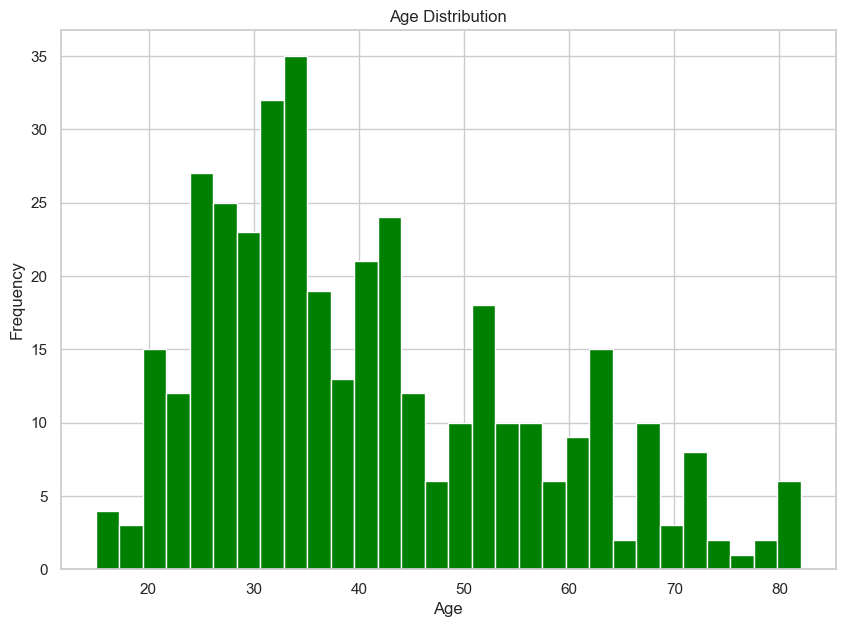

In [52]:
#Age distribution
sn.set(style='whitegrid')

fig, axes= plt.subplots(figsize=(10,7))

axes.hist(df['Age'], bins=30, color="green")
axes.set_xlabel("Age")
axes.set_ylabel("Frequency")
axes.set_title("Age Distribution")

### We can say that majority of the patients are of 30 to 34 yrs

(array([163.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  74.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 133.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 30 artists>)

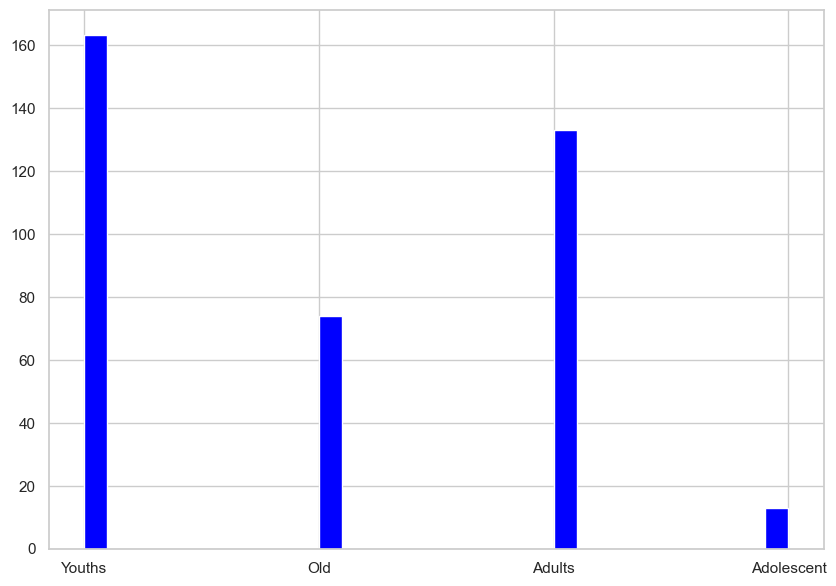

In [53]:
#Age distribution
sn.set(style='whitegrid')

fig, axes= plt.subplots(figsize=(10,7))

axes.hist(df['Age Class'], bins=30, color="Blue")

In [54]:
df.groupby("Age Class")["Age Class"].count()

Age Class
Adolescent     13
Adults        133
Old            74
Youths        163
Name: Age Class, dtype: int64

### We can say that the dataset comprise of the total number of 163 patients whose Age Class is between 21 to 35 i.e Youths from our Age grouping

In [55]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred',
       'Age Class'],
      dtype='object')

In [ ]:
col_ = []

In [57]:
cols = ['Risk', 'Stage', 'Adenopathy']

In [58]:
for i in cols:
    print(df[i].value_counts())
    print('\n')

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64


Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64


Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64




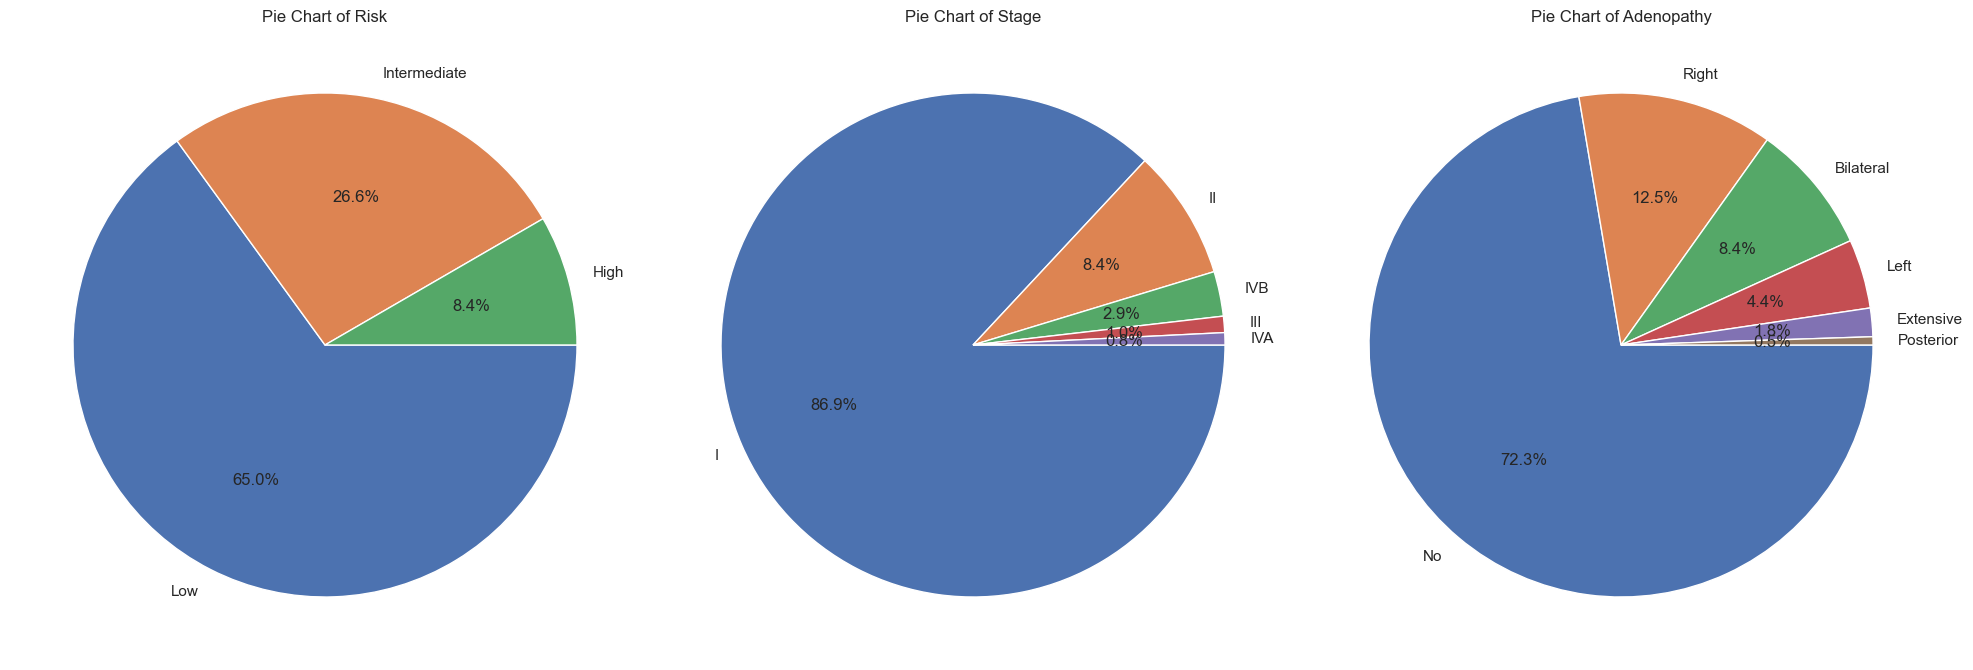

In [65]:
import math

# choosing the number of features
num_features = len(cols)
num_rows = 1
num_cols = math.ceil(num_features/num_rows)

# creating the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,8))

# flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()
    
#plotting the figure
for i, columns in enumerate(cols):
    df[columns].value_counts().plot.pie(autopct='%1.1f%%', counterclock=False, ax=axes[i])
    axes[i].set_title(f'Pie Chart of {columns}')
    axes[i].set_ylabel("")
    
    
# Adjust layout
plt.tight_layout()
plt.show()

"fig, axes = plt.subplots(1, 4, figsize=(20, 8))\n\n\n\nsn.countplot(x=df['Gender'], data=df, palette='OrRd', ax=axes[0])\naxes[0].set_title('Gender Distribution')\naxes[0].set_xlabel('Gender')\naxes[0].set_ylabel('Count')    \n\n\nsn.countplot(x=df['Smoking'], data=df, palette='OrRd', ax=axes[1])\naxes[1].set_title('Smoking Distribution')\naxes[1].set_xlabel('Smoking')\naxes[1].set_ylabel('Count')\n\nsn.countplot(x=df['Hx Smoking'], data=df, palette='OrRd', ax=axes[2])\naxes[2].set_title('Smoking History Distribution')\naxes[2].set_xlabel('Smoking History')\naxes[2].set_ylabel('Count')\n\nsn.countplot(x=df['Response'], data=df, palette='OrRd', ax=axes[3])\naxes[3].set_title('Respose to Treatment Distribution')\naxes[3].set_xlabel('Response to Treatment')\naxes[3].set_ylabel('Count')\naxes[3].tick_params(axis='x', rotation=45)\nplt.show()\n"

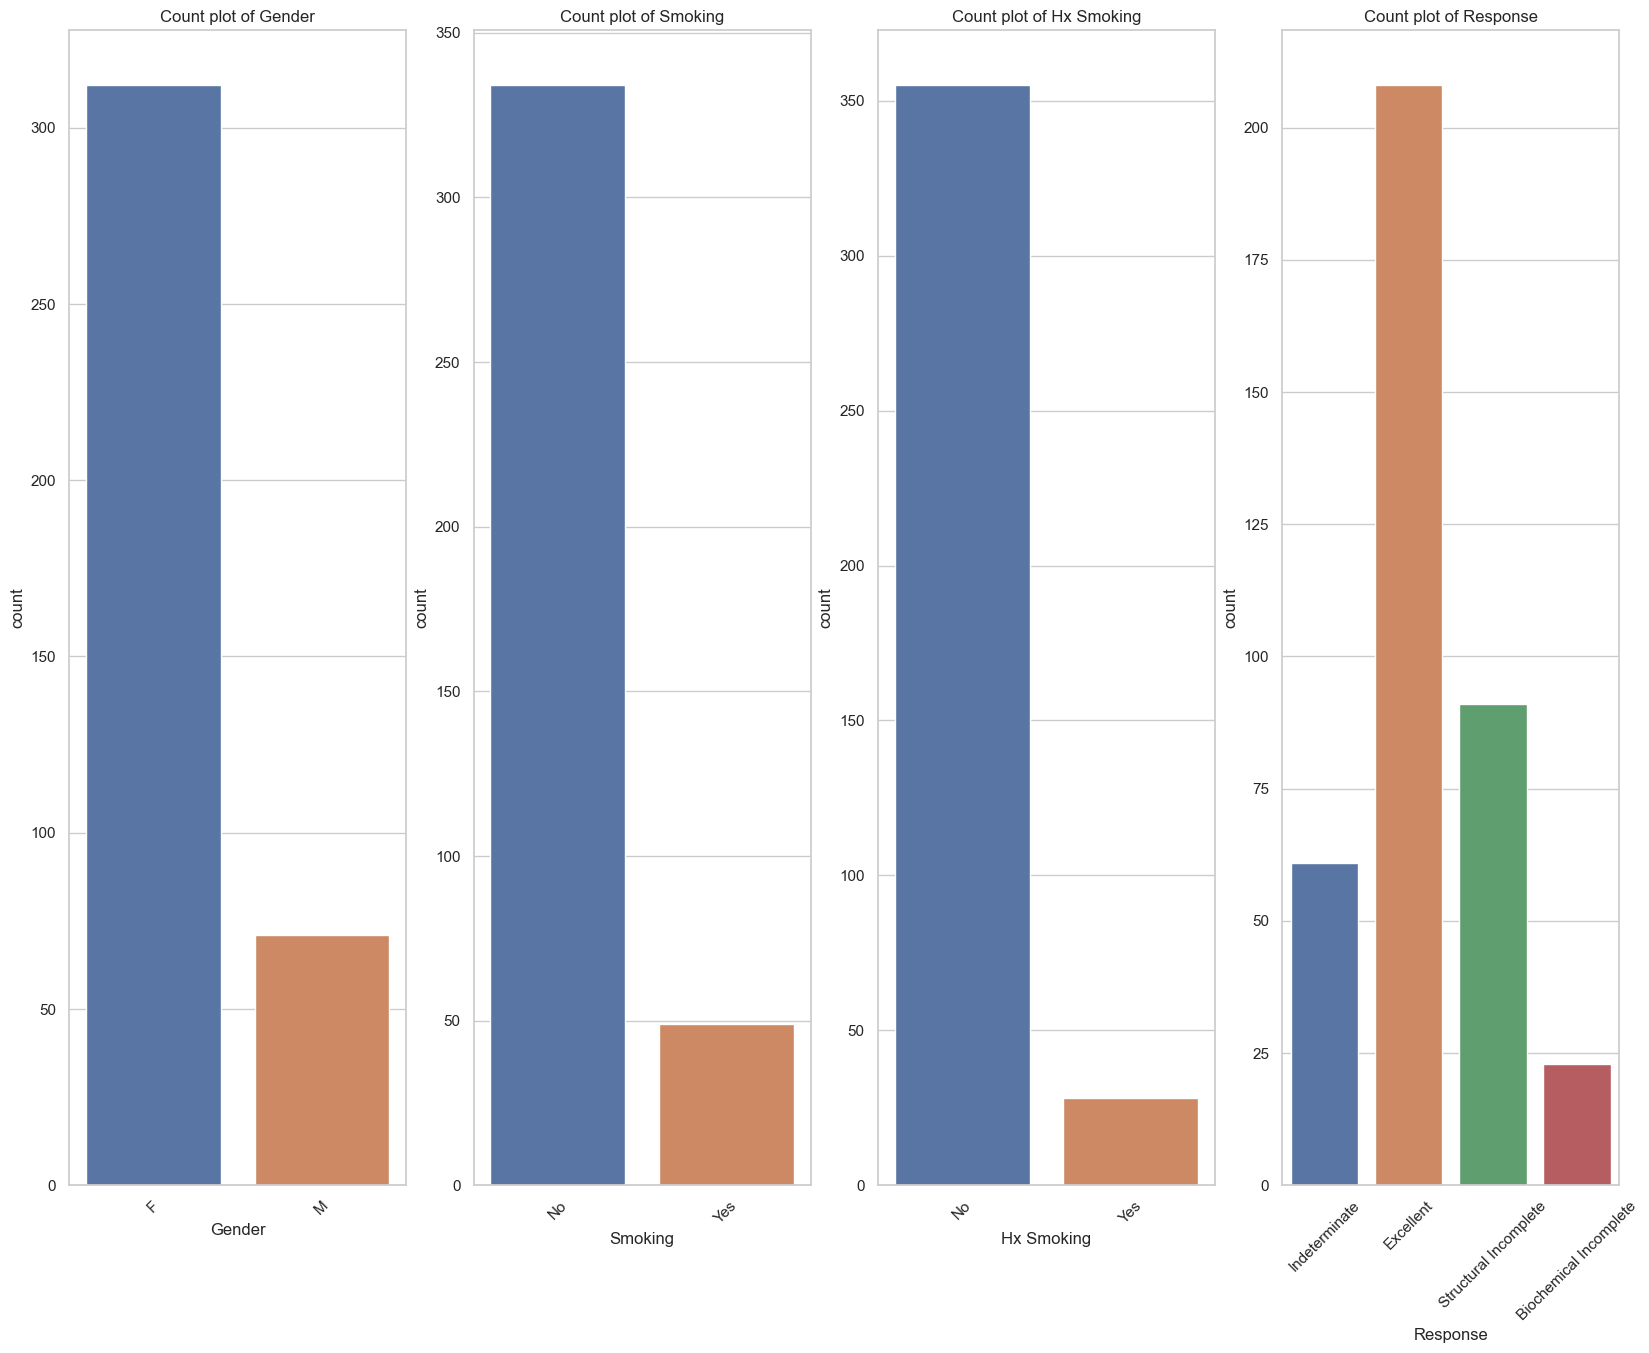

In [68]:
#plotting the count of the distribution of Gender, smoking, Smoking Histry, and Treatment Response
import math
col_count = ["Gender","Smoking","Hx Smoking", "Response"]

# choosing the number of features, rows and column of the chart
col_features = len(col_count)
num_rows = 1
num_cols = math.ceil(col_features/num_rows)

# creating the figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20,15))

#flatten axes
if col_features > 1:
    axes = axes.flatten()
    
# Generating the subplots
for i, column in enumerate(col_count):
    sn.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Count plot of {column}')
    axes[i].tick_params(axis='x', rotation=45)



#### From the above, we can say that:
* 1. Females Gender has more of the Thyroid Cancer
* 2. Patient who are not smokers has more of Thyroid Cancer
* 3. it was noticed that most patients with no smoking history has the Thyroid Cancer
* 4. Majority of the Patients has Excellent Response to Treatment, that means the rate of recovery are very large

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


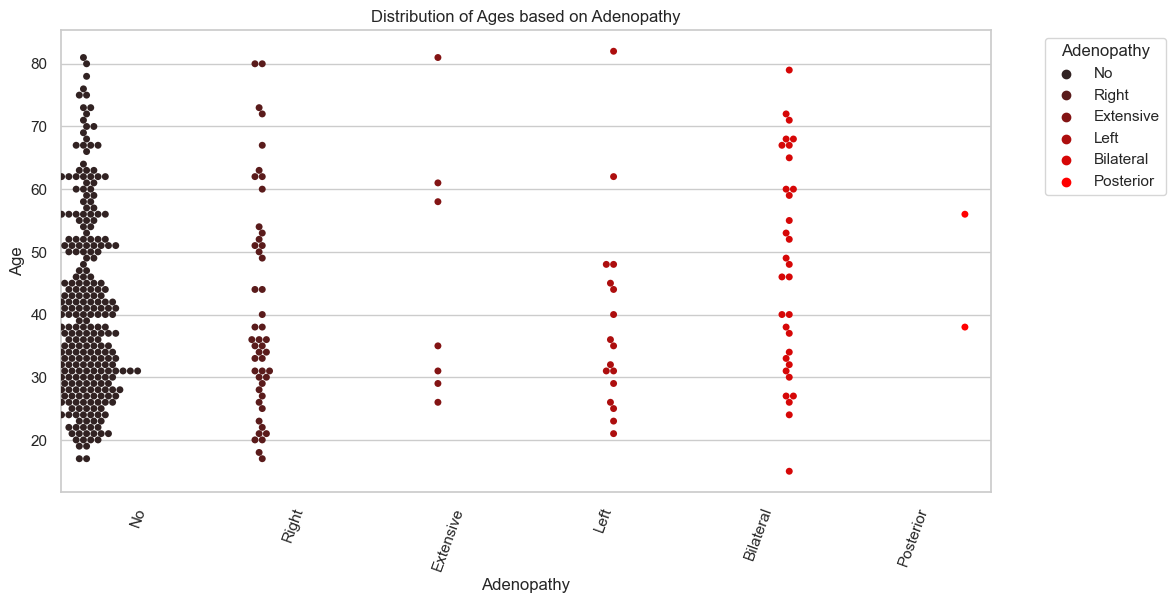

In [54]:
#the distribution of ages based on the presence and location of adenopathy using a swarm plot.
plt.figure(figsize=(12, 6))
sn.swarmplot(x='Adenopathy', y='Age', data=df, color="red", hue='Adenopathy', dodge=True)
plt.title('Distribution of Ages based on Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Adenopathy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* From the above we counld understand that Most of the Patients has No Lympth Adenopathy and most of the age their age is between 25 to 47 years old


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:green'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


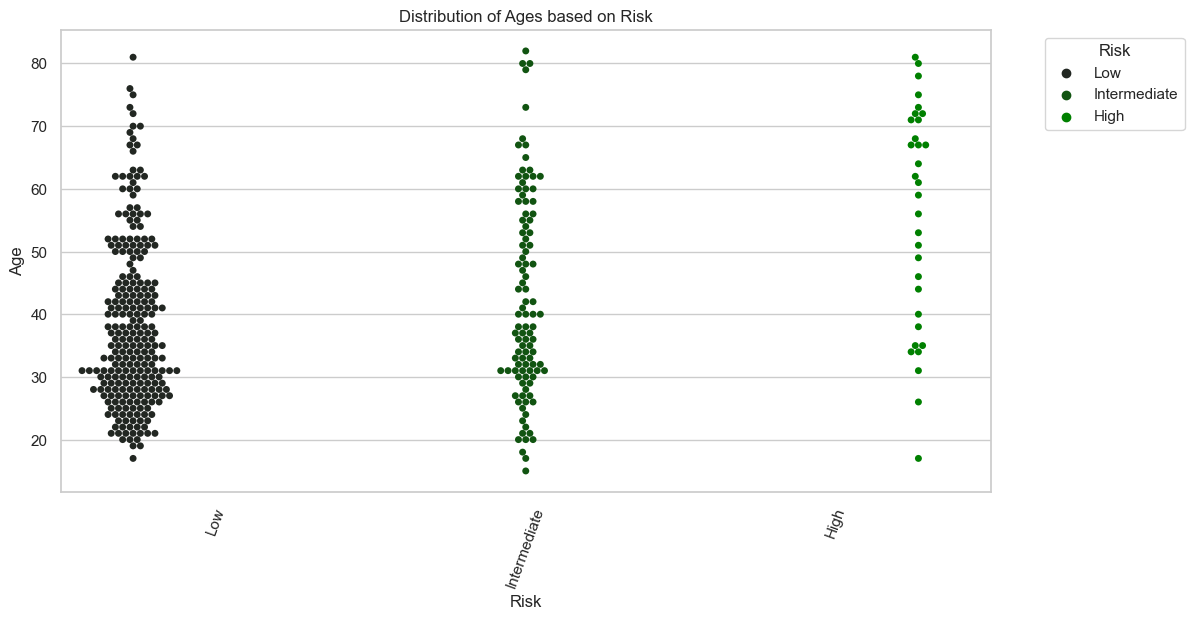

In [55]:
#the distribution of ages based on the Risk using a swarm plot.
plt.figure(figsize=(12, 6))
sn.swarmplot(x='Risk', y='Age', data=df, color='green', hue='Risk', dodge=True)
plt.title('Distribution of Ages based on Risk')
plt.xlabel('Risk')
plt.ylabel('Age')
plt.xticks(rotation=70)
plt.legend(title='Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

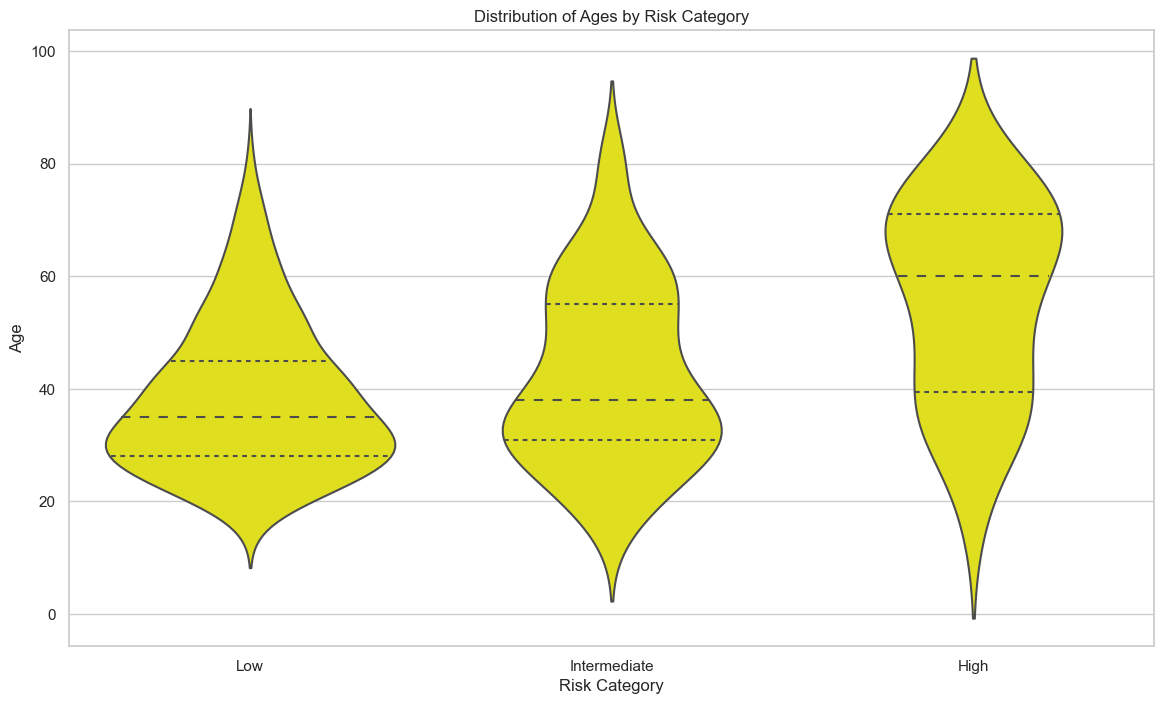

In [57]:
plt.figure(figsize=(14, 8))
sn.violinplot(x=df['Risk'], y='Age', data=df, inner='quartile', color='yellow')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

### General insight from the Data Exploration and Visualization
1. The female patients suffer more of the Thyroid Cancer
2. The female patients has high risk of having Thyroid Cancer.
3. Also the Patients of the age 56 and above has high risk of having Thyroid Cancer.
4. We can say that majority of the patients are of 30 to 34 yrs
5. Majority of the Patients has Excellent Response to Treatment, that means the rate of recovery are very large
6. Smoking has no effect on Thyroid Cancer
7. We could say that Most of the Patients has No Lympth Adenopathy and most of their age is between 25 to 47 years old
